Натренувати класифікатор на датасеті

https://archive.ics.uci.edu/ml/datasets/credit+approval

DecisionTreeClassifier

Провести всі етапи (підготовка, графічний аналіз, нові фічі....)

Додатково: порівняти із LogisticRegression і метричною моделлю


* A1:	b, a.
* A2:	continuous.
* A3:	continuous.
* A4:	u, y, l, t.
* A5:	g, p, gg.
* A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
* A7:	v, h, bb, j, n, z, dd, ff, o.
* A8:	continuous.
* A9:	t, f.
* A10:	t, f.
* A11:	continuous.
* A12:	t, f.
* A13:	g, p, s.
* A14:	continuous.
* A15:	continuous.
* A16: +,-         (class attribute) - target

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [61]:
df = pd.read_csv('hw-8/credit+approval/crx.data')
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [62]:
# Filter A1 and A2 
df[['A1', 'A2']] = df[['A1', 'A2']].replace('?', np.nan)
df.dropna(subset=['A1', 'A2'], inplace=True)
# Filter A4 
df = df[df['A4'].isin(['u', 'y'])].copy()
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [63]:
df['A2'] = df['A2'].astype(float)
print(df.dtypes)

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object


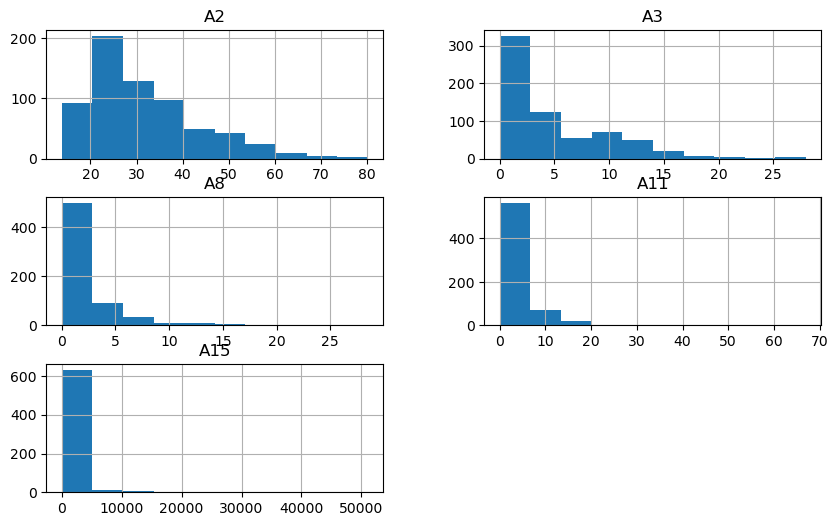

In [64]:
numerical_features = ['A2', 'A3', 'A8', 'A11', 'A15']
df[numerical_features].hist(figsize=(10, 6));

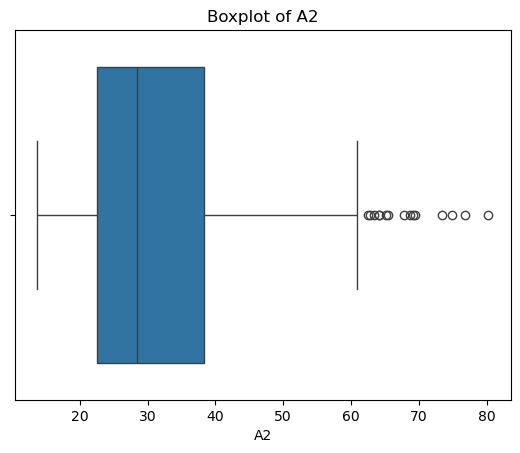

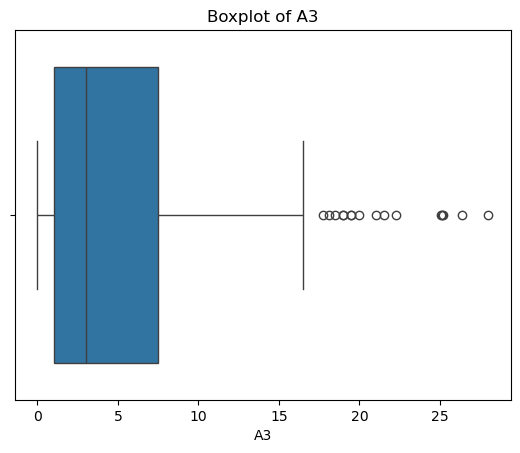

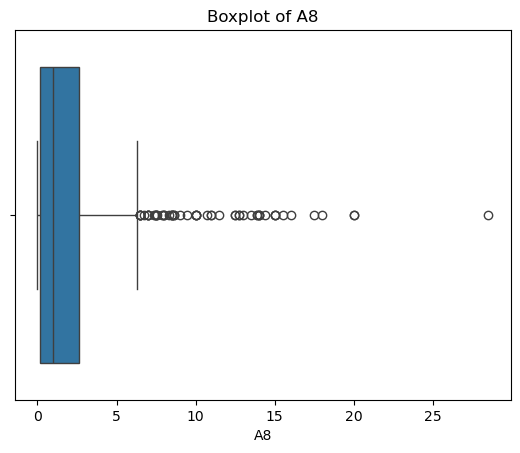

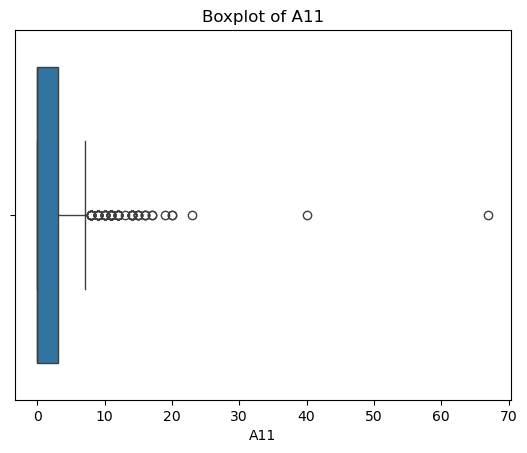

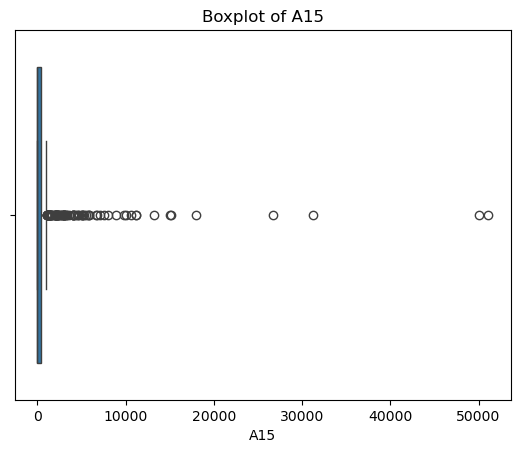

In [65]:
for feature in numerical_features:
    plt.figure()  # Creates a new figure
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot of {feature}')
    plt.show()  # Displays the figure

Original data size: (657, 16)
Filtered data size: (560, 16)


Text(0.5, 1.0, 'After Outlier Removal')

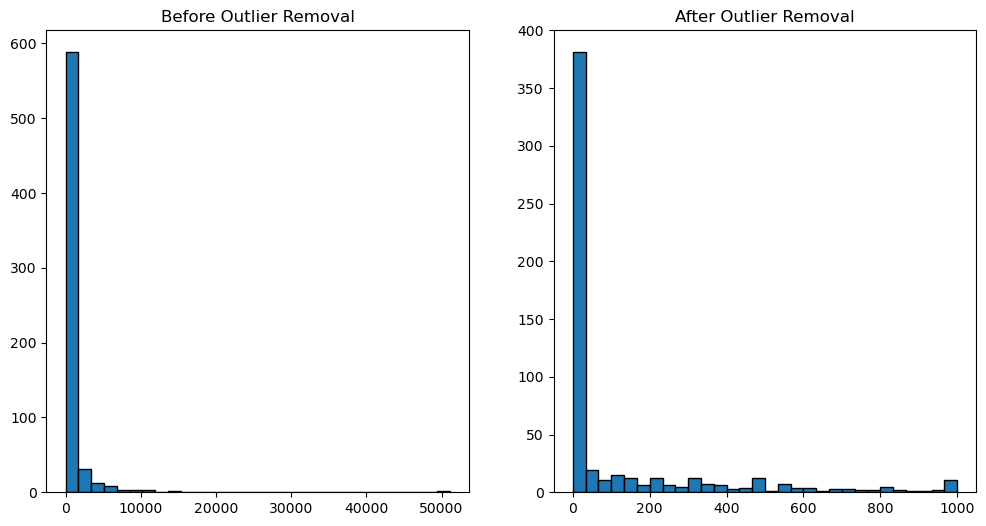

In [66]:
# looks we need to normalize A15 firstly

Q1 = df['A15'].quantile(0.25)
Q3 = df['A15'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers (we're only interested in the upper side)
upper_bound = Q3 + 1.5 * IQR

# Filter out the upper outliers
df_filtered = df[df['A15'] <= upper_bound]

print(f"Original data size: {df.shape}")
print(f"Filtered data size: {df_filtered.shape}")

# Visualizing the Data Distribution Before and After Removing Outliers
plt.figure(figsize=(12, 6))

# Before outlier removal
plt.subplot(1, 2, 1)
plt.hist(df['A15'], bins=30, edgecolor='black')
plt.title('Before Outlier Removal')

# After outlier removal
plt.subplot(1, 2, 2)
plt.hist(df_filtered['A15'], bins=30, edgecolor='black')
plt.title('After Outlier Removal')


Original data size: (657, 16)
Filtered data size: (655, 16)


Text(0.5, 1.0, 'After Outlier Removal')

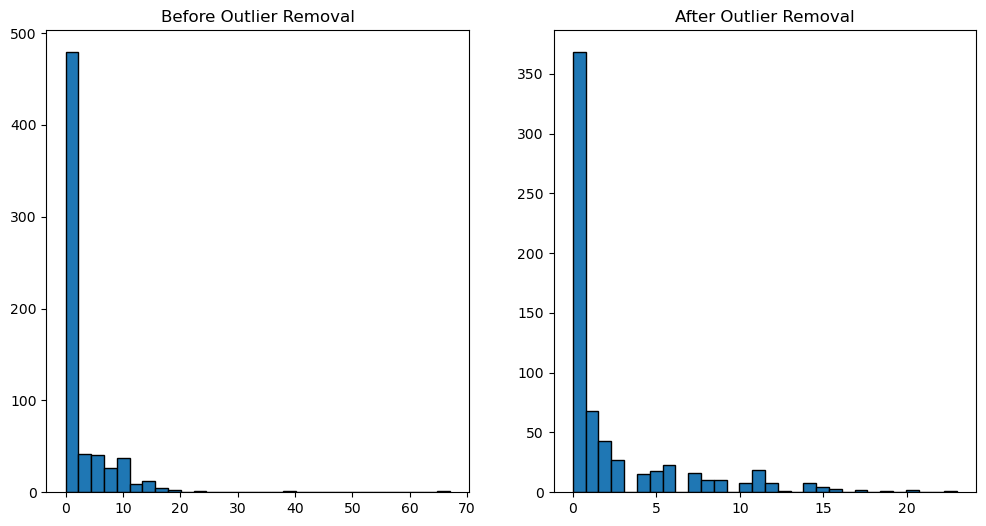

In [67]:
# Review how A11 outliers look like. I'd like to remove 5% of outliers only
Q1 = df['A11'].quantile(0.05)
Q3 = df['A11'].quantile(0.95)
IQR = Q3 - Q1

# Define the upper bound for outliers (we're only interested in the upper side)
upper_bound = Q3 + 1.5 * IQR

# Filter out the upper outliers
df_filtered = df[df['A11'] <= upper_bound]

print(f"Original data size: {df.shape}")
print(f"Filtered data size: {df_filtered.shape}")

# Visualizing the Data Distribution Before and After Removing Outliers
plt.figure(figsize=(12, 6))

# Before outlier removal
plt.subplot(1, 2, 1)
plt.hist(df['A11'], bins=30, edgecolor='black')
plt.title('Before Outlier Removal')

# After outlier removal
plt.subplot(1, 2, 2)
plt.hist(df_filtered['A11'], bins=30, edgecolor='black')
plt.title('After Outlier Removal')

           A2        A3        A8       A11       A15
A2   1.000000  0.210643  0.407746  0.217873  0.077387
A3   0.210643  1.000000  0.266832  0.235155  0.036880
A8   0.407746  0.266832  1.000000  0.314357  0.111442
A11  0.217873  0.235155  0.314357  1.000000  0.143391
A15  0.077387  0.036880  0.111442  0.143391  1.000000


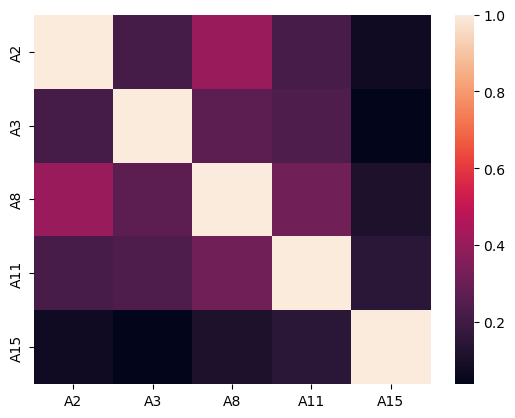

In [68]:
df = df_filtered
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)
# Correlation looks good - there is no strong correlation between numerical features

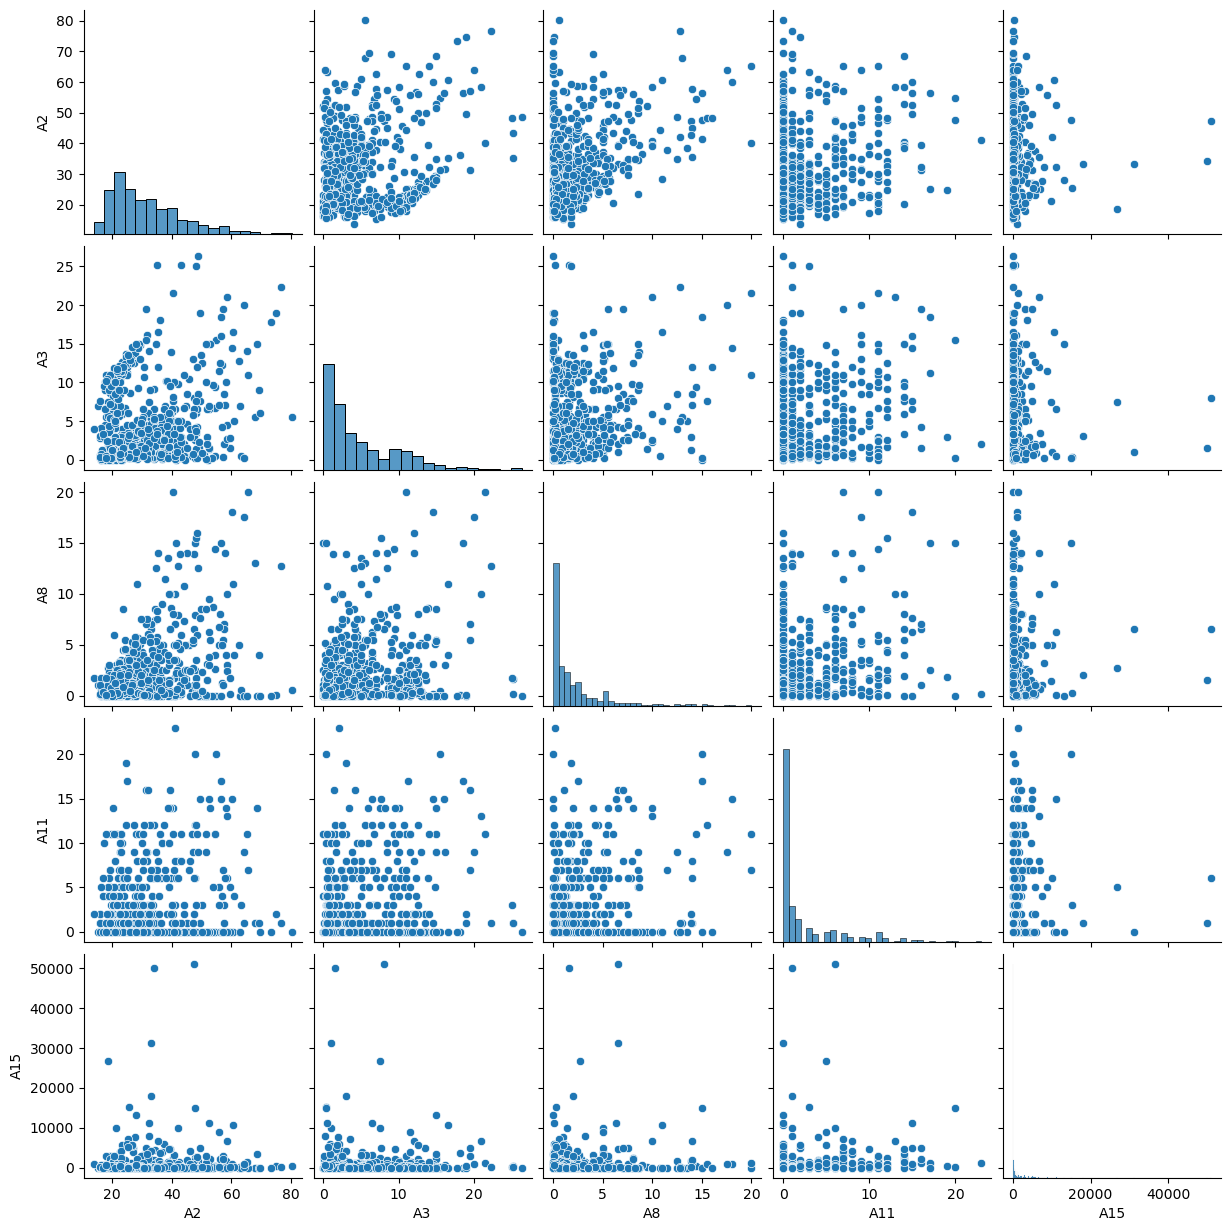

In [69]:
sns.pairplot(df[numerical_features]);

In [70]:
# Review and convert categorical features
categorical_features = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14']

In [71]:
category_counts = {}

# Loop through each categorical feature and count the unique categories
for feature in categorical_features:
    unique_count = df[feature].nunique()
    category_counts[feature] = unique_count

# Convert the dictionary to a DataFrame for better visualization
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Feature', 'Unique Categories'])
category_counts_df

,Feature,Unique Categories
0,A1,2
1,A4,2
2,A5,2
3,A6,15
4,A7,10
5,A9,2
6,A10,2
7,A12,2
8,A13,3
9,A14,163


In [72]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded

,A2,A3,A8,A11,A15,A16,A1_a,A1_b,A4_u,A4_y,...,A14_00600,A14_00640,A14_00680,A14_00711,A14_00720,A14_00760,A14_00840,A14_00980,A14_02000,A14_?
0,58.67,4.460,3.04,6,560,+,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,24.50,0.500,1.50,0,824,+,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,27.83,1.540,3.75,5,3,+,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,20.17,5.625,1.71,0,0,+,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,32.08,4.000,2.50,0,0,+,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,21.08,10.085,1.25,0,0,-,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
685,22.67,0.750,2.00,2,394,-,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
686,25.25,13.500,2.00,1,1,-,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
687,17.92,0.205,0.04,0,750,-,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn import tree

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

target = 'A16'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
# clf.feature_importances_

Accuracy: 0.8091603053435115
Classification Report:
              precision    recall  f1-score   support

           +       0.74      0.81      0.77        52
           -       0.86      0.81      0.84        79

    accuracy                           0.81       131
   macro avg       0.80      0.81      0.80       131
weighted avg       0.81      0.81      0.81       131



[Text(0.7606534090909091, 0.9705882352941176, 'x[36] <= 0.5\ngini = 0.497\nsamples = 524\nvalue = [241, 283]'),
 Text(0.5667613636363636, 0.9117647058823529, 'x[4] <= 235.0\ngini = 0.31\nsamples = 281\nvalue = [227, 54]'),
 Text(0.36079545454545453, 0.8529411764705882, 'x[3] <= 0.5\ngini = 0.437\nsamples = 152\nvalue = [103.0, 49.0]'),
 Text(0.19318181818181818, 0.7941176470588235, 'x[1] <= 2.375\ngini = 0.497\nsamples = 78\nvalue = [42, 36]'),
 Text(0.09090909090909091, 0.7352941176470589, 'x[1] <= 0.375\ngini = 0.438\nsamples = 34\nvalue = [11, 23]'),
 Text(0.06818181818181818, 0.6764705882352942, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.11363636363636363, 0.6764705882352942, 'x[13] <= 0.5\ngini = 0.328\nsamples = 29\nvalue = [6, 23]'),
 Text(0.06818181818181818, 0.6176470588235294, 'x[0] <= 54.335\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.045454545454545456, 0.5588235294117647, 'x[16] <= 0.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.02272727272727

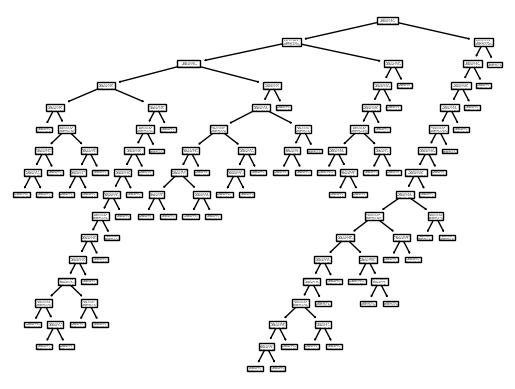

In [79]:
tree.plot_tree(clf)

In [92]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=[f'class_{i}' for i in range(2)]))

# As a result it is a little bit better 
def find_best_model(X_train, y_train):
    # Add search best max depth parameter using GridSearchCV
    from sklearn.model_selection import GridSearchCV
    param_grid = {
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    }
    clf_rf = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"Best parameters: {best_params}")
    print(f"Best cross-validation score: {best_score}")
    return best_params

best_params = find_best_model(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=best_params['max_depth'], random_state=0).fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=[f'class_{i}' for i in range(2)]))


              precision    recall  f1-score   support

     class_0       0.78      0.87      0.82        52
     class_1       0.90      0.84      0.87        79

    accuracy                           0.85       131
   macro avg       0.84      0.85      0.84       131
weighted avg       0.85      0.85      0.85       131

Best parameters: {'max_depth': 12}
Best cross-validation score: 0.875934065934066
              precision    recall  f1-score   support

     class_0       0.77      0.92      0.84        52
     class_1       0.94      0.82      0.88        79

    accuracy                           0.86       131
   macro avg       0.86      0.87      0.86       131
weighted avg       0.88      0.86      0.86       131



In [99]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Fix issue with max_iter - looks it was possible only after scaling data
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Add a scaler to the pipeline
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])
clf_knn = KNeighborsClassifier()

# Train the models
# clf_lr.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

# Make predictions
y_pred_lr = clf_lr.predict(X_test)
y_pred_knn = clf_knn.predict(X_test)

# Evaluate the models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

report_rf = classification_report(y_test, y_pred_rf)
report_lr = classification_report(y_test, y_pred_lr)
report_knn = classification_report(y_test, y_pred_knn)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the results
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf}")
print("\nLogistic Regression")
print(f"Accuracy: {accuracy_lr}")

print("\nK-Nearest Neighbors")
print(f"Accuracy: {accuracy_knn}")

Random Forest Classifier
Accuracy: 0.8625954198473282

Logistic Regression
Accuracy: 0.6946564885496184

K-Nearest Neighbors
Accuracy: 0.7251908396946565


In [ ]:
# As we can see Random Forest hase best results as classifier model. 